In [75]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
import numpy as np
from scipy import signal
from scipy.signal import butter
from scipy.signal import filtfilt
import matplotlib.pyplot as plt
import h5py

In [77]:
from utils.utils import *

### First decimate the files down to 100 Hz, and convert to strain values

In [78]:
# Put link to data Berkeley Box and file name
dir_brake = r'D:\das-data-oklahoma\prelim-test\recording_2023-06-06T11_16_40-0500'

In [79]:
strain_brake, time_brake = load_decim_data(dir_brake,'sensor_2023-06-06T111659-0500_decimated100hz_compiled')


In [50]:
print(np.shape(strain_brake))
print(np.shape(time_brake))

(102, 318040)
(318040,)


In [52]:
print(time_brake[0])
print(type(time_brake[0]))

2023-06-06 09:16:59.898600
<class 'datetime.datetime'>


In [81]:
nch,nt = np.shape(strain_brake)

Text(0, 0.5, 'microStrain')

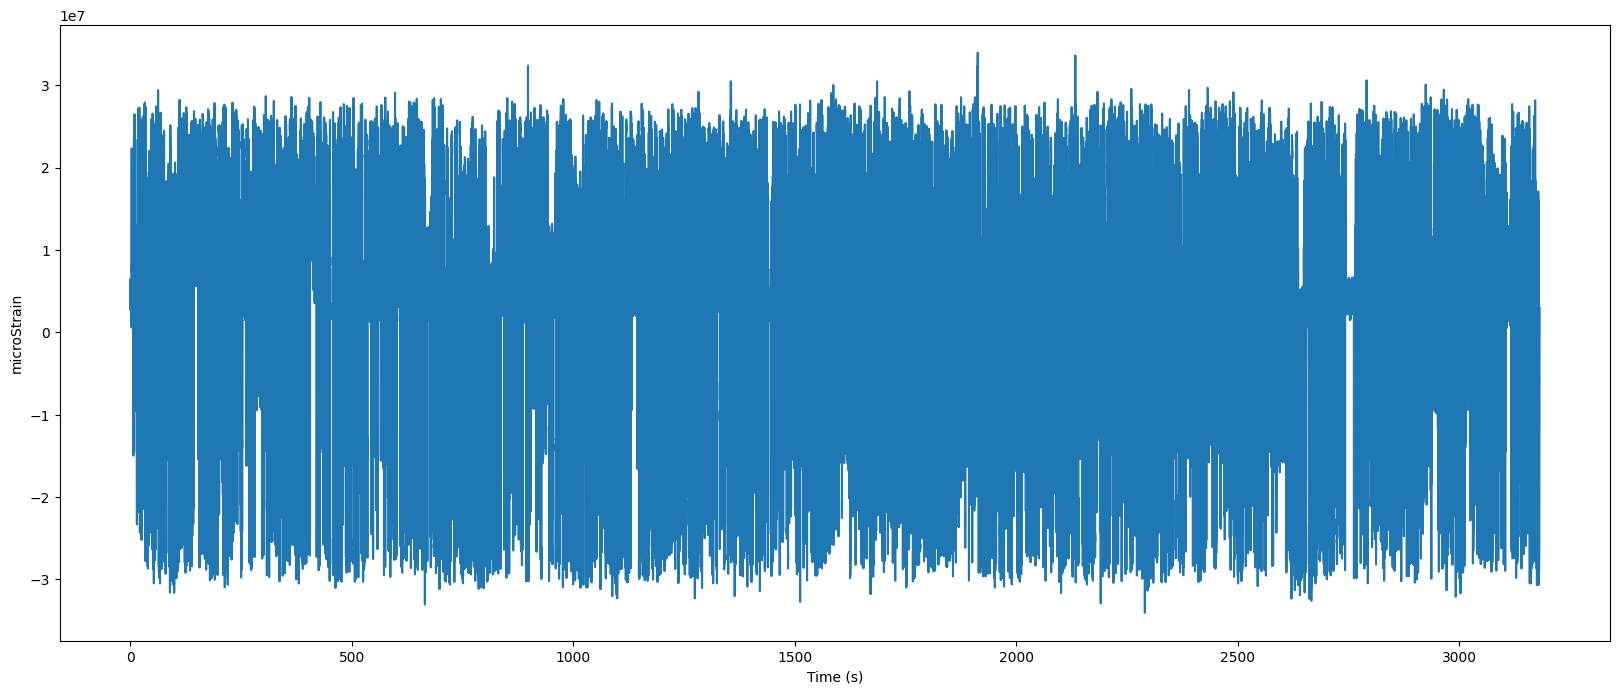

In [82]:
fig,axs = plt.subplots(1,1,figsize=(20,8))
axs.plot(np.linspace(0,nt/100,nt),strain_brake[4,:])
axs.set_xlabel('Time (s)')
axs.set_ylabel('microStrain')

In [83]:
print(np.max(strain_brake[4,:]))
print(np.min(strain_brake[4,:]))

33940853.15319705
-34043722.99529056


In [62]:
np.where(raw_data[:,4] == np.max(raw_data[:,4]))

(array([1893346]),)

In [22]:
def signal_unwrap(das_record):
    # Initialize array for sign change indicators
    sign_change = np.zeros_like(das_record)

    # Calculate the differences in signs between successive values
    diff_signs = np.diff(np.sign(das_record))

    # Identify where sign changes from positive to negative (assign 1)
    sign_change[1:][diff_signs < 0] = 1
    # Identify where sign changes from negative to positive (assign -1)
    sign_change[1:][diff_signs > 0] = -1

    # Multiply by saturation amplitude
    correction = sign_change * (2**32)

    # Correct the DAS record
    das_record_corrected = das_record + correction

    return das_record_corrected

In [84]:
test_corrected = np.unwrap(strain_brake[4,:])

Text(0, 0.5, 'microStrain')

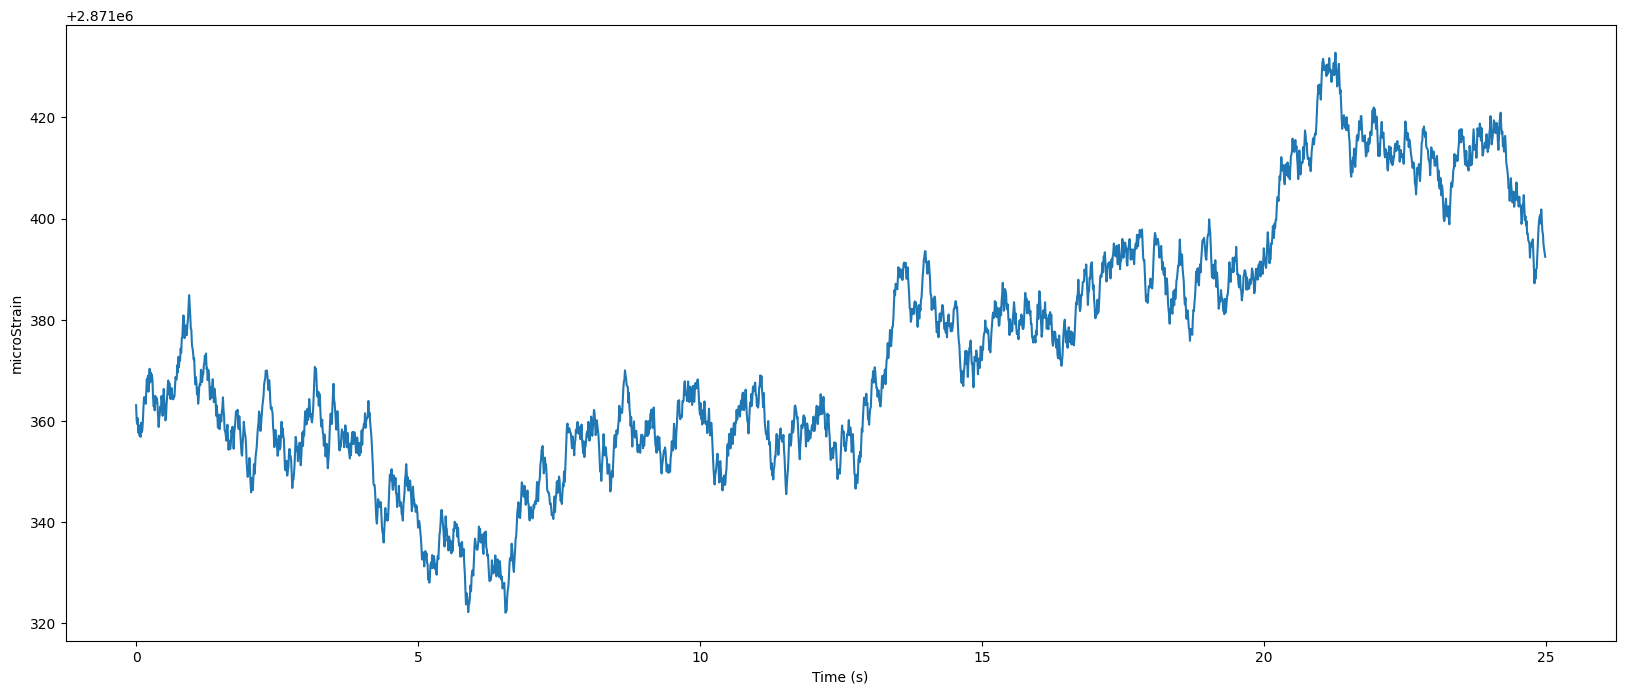

In [87]:
begin_time_point = 0
end_time_point = 2500

nyquist_freq = 0.5*100
normal_cutoff = 1 / nyquist_freq
b,a, = butter(2,normal_cutoff,btype='high')



fig,axs = plt.subplots(1,1,figsize=(20,8))
# axs.plot(np.linspace(0,nt/100,nt)[begin_time_point:end_time_point],filtfilt(b,a,np.unwrap(test_corrected[begin_time_point:end_time_point])))
# axs.plot(np.linspace(0,nt/100,nt)[begin_time_point:end_time_point],test_corrected[begin_time_point:end_time_point])
# axs.plot(np.linspace(0,nt/100,nt)[begin_time_point:end_time_point],strain_brake[4,begin_time_point:end_time_point])

# axs.plot(np.linspace(0,nt/5000,nt)[begin_time_point:end_time_point],np.unwrap(test_corrected[begin_time_point:end_time_point]))
# axs.plot(np.linspace(0,nt/5000,nt)[begin_time_point:end_time_point],test_corrected[begin_time_point:end_time_point])
axs.set_xlabel('Time (s)')
axs.set_ylabel('microStrain')

Text(0, 0.5, 'microStrain')

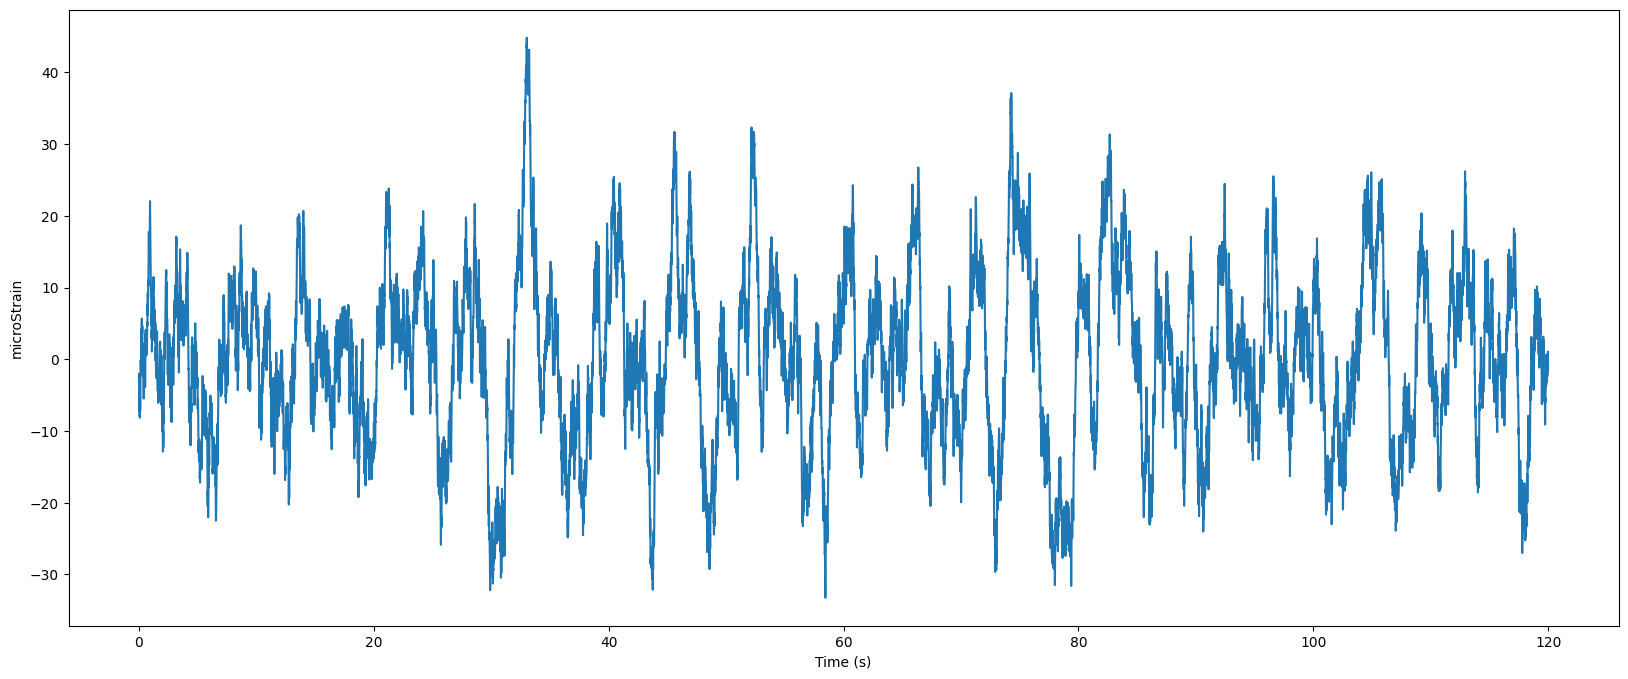

In [88]:
begin_time_point = 0
end_time_point = 12000

nyquist_freq = 0.5*100
normal_cutoff = .1 / nyquist_freq
b,a, = butter(2,normal_cutoff,btype='high')



fig,axs = plt.subplots(1,1,figsize=(20,8))
axs.plot(np.linspace(0,nt/100,nt)[begin_time_point:end_time_point],filtfilt(b,a,np.unwrap(test_corrected[begin_time_point:end_time_point])))
# axs.plot(np.linspace(0,nt/100,nt)[begin_time_point:end_time_point],filtfilt(b,a,strain_brake[4,:][begin_time_point:end_time_point]))
# axs.plot(np.linspace(0,nt/100,nt)[begin_time_point:end_time_point],test_corrected[begin_time_point:end_time_point])
# axs.plot(np.linspace(0,nt/100,nt)[begin_time_point:end_time_point],strain_brake[4,begin_time_point:end_time_point])

# axs.plot(np.linspace(0,nt/5000,nt)[begin_time_point:end_time_point],np.unwrap(test_corrected[begin_time_point:end_time_point]))
# axs.plot(np.linspace(0,nt/5000,nt)[begin_time_point:end_time_point],test_corrected[begin_time_point:end_time_point])
axs.set_xlabel('Time (s)')
axs.set_ylabel('microStrain')

In [60]:
fft = np.fft.rfft(test_corrected)
psd = np.abs(fft)**2
freqs = np.fft.rfftfreq(len(test_corrected),1/100)

(0.0, 2.0)

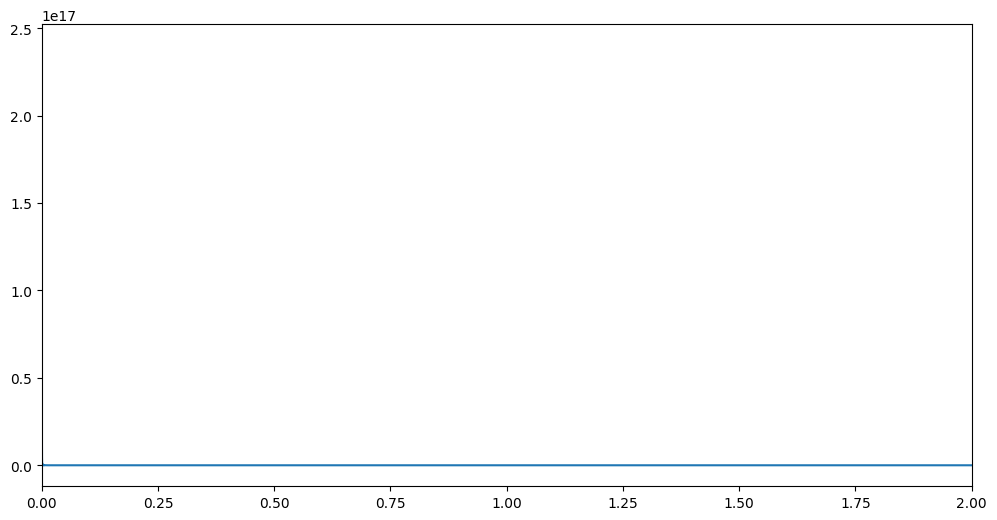

In [61]:
fig,axs=plt.subplots(1,1,figsize=(12,6))
axs.plot(freqs,psd)
axs.set_xlim(0,2)

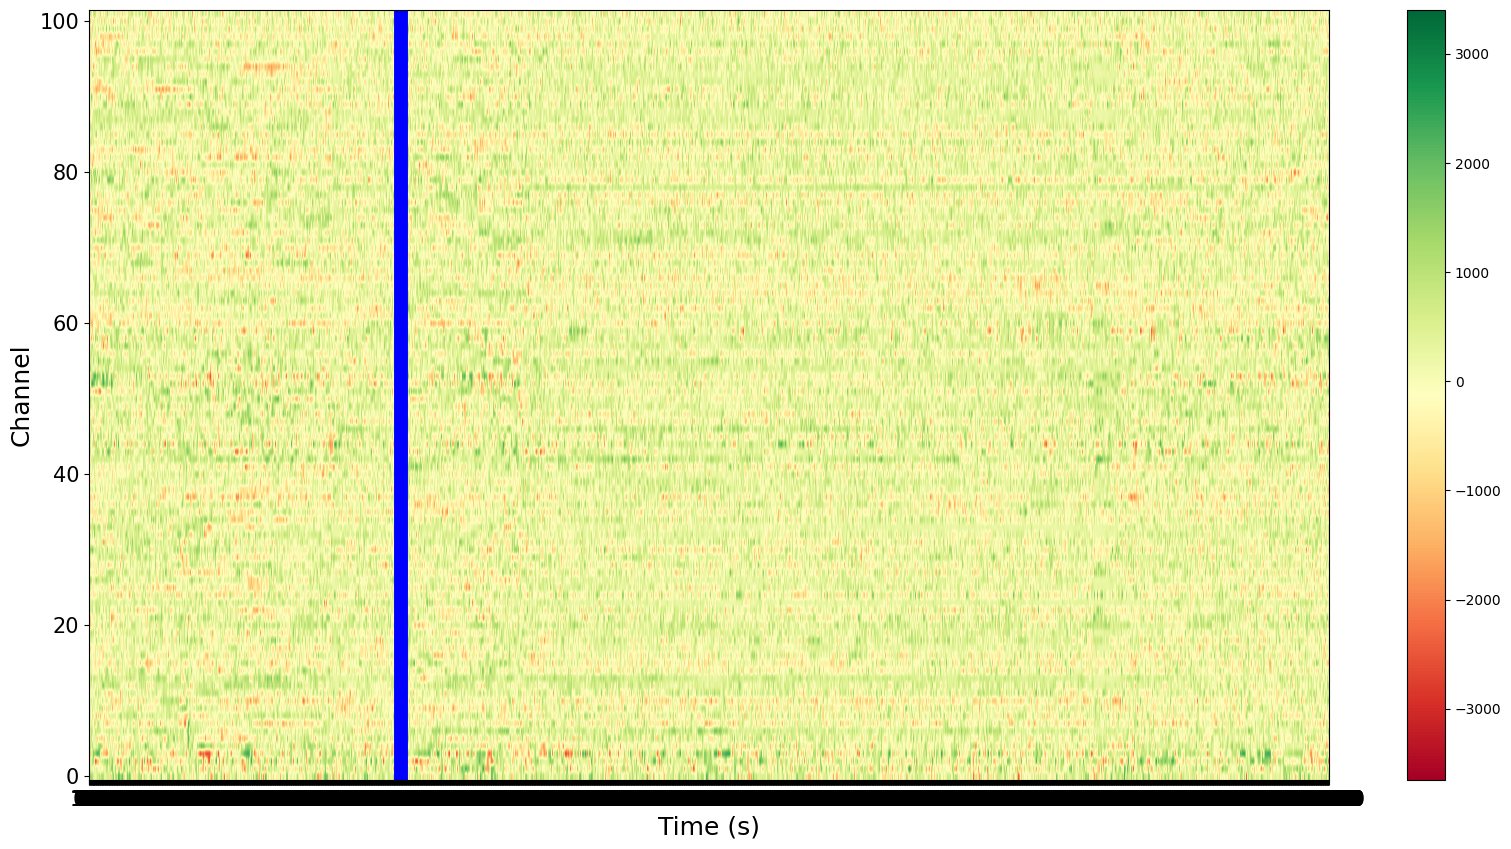

In [47]:
cmap = plt.get_cmap('RdYlGn')  # Red-Yellow-Green colormap

# Create the figure
fig, ax = plt.subplots(figsize=(20,10))

# Create a pseudo-color plot with the time series data
cax = ax.imshow(strain_brake, aspect='auto', cmap=cmap, origin='lower')#,vmin=-1.5*(10**9),vmax=1.5*(10**9))

# Add a colorbar
fig.colorbar(cax)

# Set labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Channel')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.tick_params(axis='both', which='major', labelsize=15)

# Set the x-ticks to represent time
ax.set_xticks(np.arange(0, nt, 100))
ax.set_xticklabels(np.arange(0, nt/100, 1))  # Labels go from 0 to 30 seconds
ax.axvline(x=80000, linewidth=10,color='blue')

# Show the plot
plt.show()

In [119]:
def plot_spectrogram(time_series_data, spatial_point):
    frequencies, times, Sxx = signal.spectrogram(time_series_data, fs=100) 

    plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title(f'Spectrogram for Spatial Point: {spatial_point}')
    plt.colorbar(label='Intensity [dB]')
    plt.show()

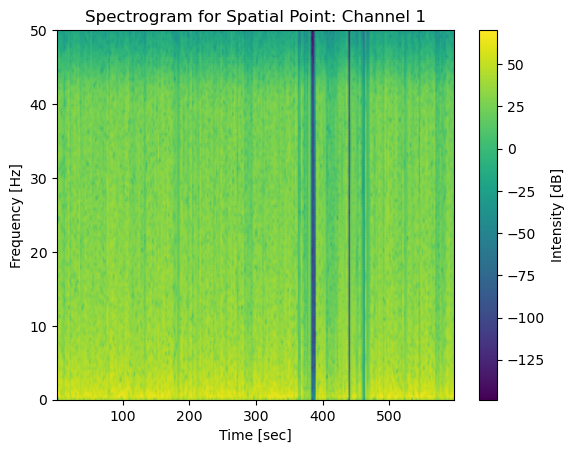

In [123]:
plot_spectrogram(strain_data[:600000,4],'Channel 1')

In [ ]:
# Each channel is approximately 8 CSUs, 1 CSU is approximately 1.027 meters
# We have 102 channel readouts

### Try to figure out which channels correspond with what!
#### Indexes: 
Estimate, from shed to beginning of first longitudinal cable: 10 meters ~ 1.5 channels<br />

### Look at the channels with highest strain first (Probably at the bottom of the tower)
#### Indexes:


In [124]:
from utils import filter_plot_single

In [90]:
phase_1 = filter_plot_single(strain_data)
# phase_2 = filter_plot_single(strain_data_P2)
# phase_3 = filter_plot_single(strain_data_P3)
# phase_4 = filter_plot_single(strain_data_P4)

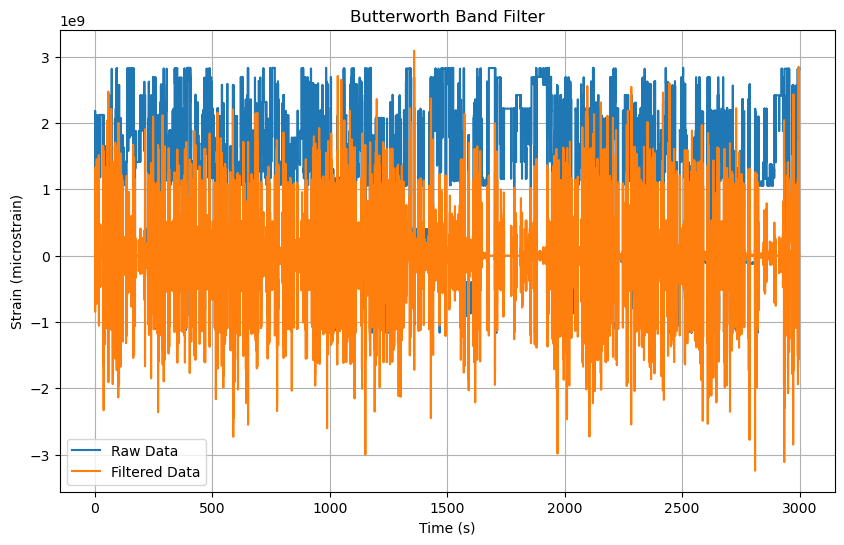

In [104]:
channel = 2
phase_1.butterworth(channel,order=2,cutoff_freq= 0.1)
phase_1.plot_side_by_side()
# phase_2.butterworth(channel,order=2,cutoff_freq= 0.05)
# phase_2.plot_side_by_side()
# phase_3.butterworth(channel,order=2,cutoff_freq= 0.05)
# phase_3.plot_side_by_side()
# phase_4.butterworth(channel,order=2,cutoff_freq= 0.05)
# phase_4.plot_side_by_side()

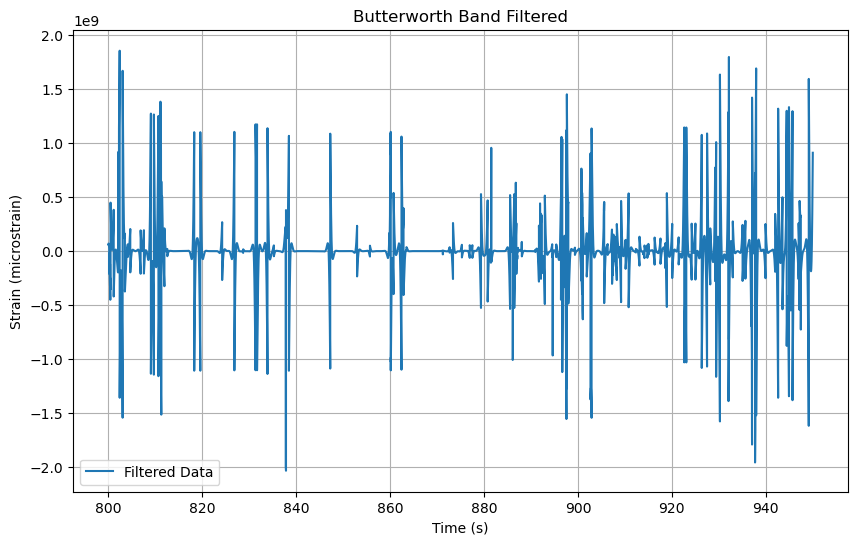

In [108]:
phase_1.plot_filtered(time_start=800000,time_end=950000)
# phase_2.psd_freqs()
# phase_3.psd_freqs()
# phase_4.psd_freqs()

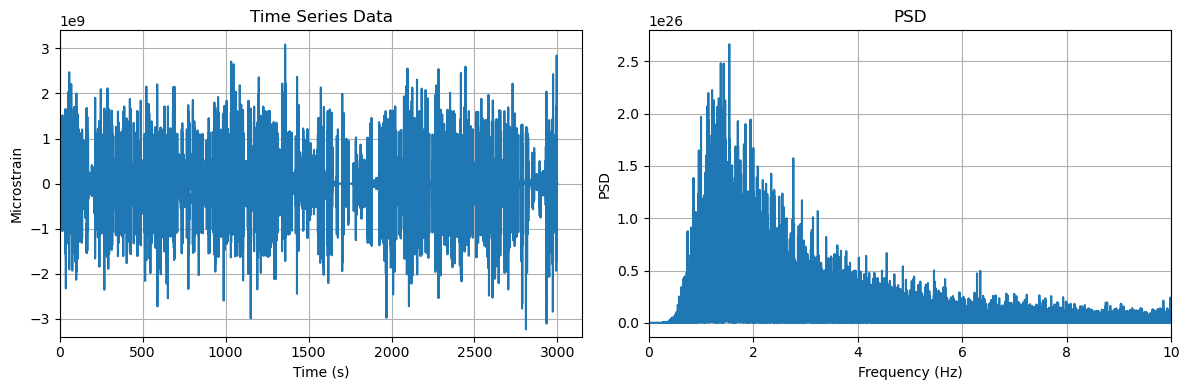

In [106]:
phase_1.plot_psd_filtered(10)
# phase_2.plot_psd_filtered(5)
# phase_3.plot_psd_filtered(5)
# phase_4.plot_psd_filtered(5)

In [109]:
# Listing the relevant channels
# channels = [6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,26,27,28,30,31,32,33,34,35,36,37,38,39] 

channels = range(13,16)
print(channels)
# recall that each channel is 1 csu ~ 8m
# channels = [54,53,52,51,50,49,48,46,45,44,43,39,38,37]
# channels = [12,13,14,15,16,17,19,20,21,22,26,27,54,53,52,51,50,49,48,46,45,44,43,39,38,37,59,60,61,62,63,64,66,67,68,69,74,75,76,104,103,102,101,100,99,97,96,95,94,90,89]

range(13, 16)


In [110]:
phase_1.butter_all(channels=channels,cutoff_freq=0.1,freq=5000)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

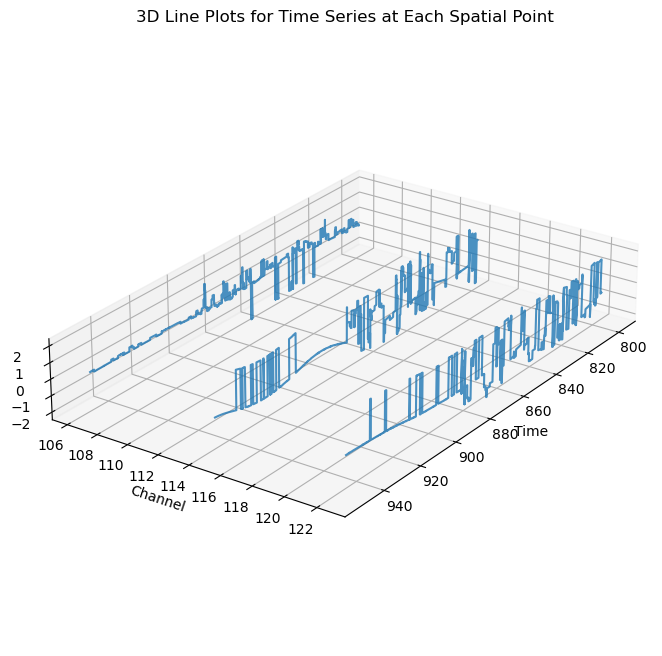

In [111]:
time_start = 0
phase_1.iso_view_plot(channels=channels,time_start=800000,time_end=950000)

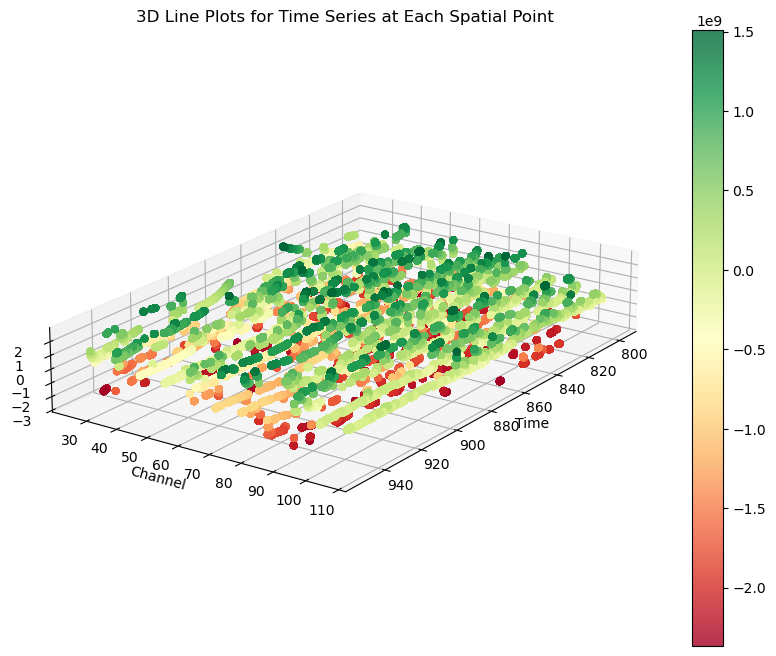

In [103]:

phase_1.iso_view_scatter(channels=channels,time_start=800000,time_end=950000)


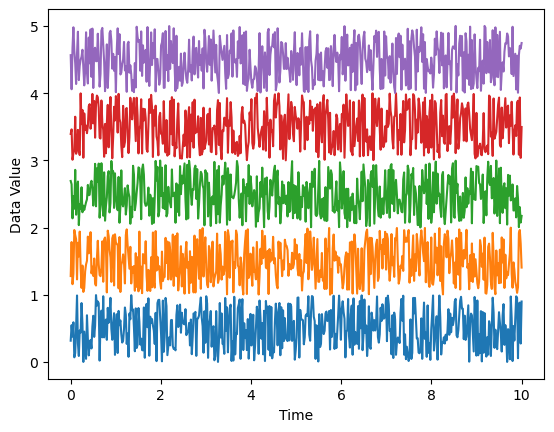

In [138]:
import numpy as np
import matplotlib.pyplot as plt

# Let's generate some example data
# Assume data_all is a 2D array where each row represents a spatial point and each column is a time point
num_spatial_points = 5
num_time_points = 500
data_all = np.random.rand(num_spatial_points, num_time_points)

# Generate time points
time = np.linspace(0, 10, num_time_points)

# Create the figure
fig, ax = plt.subplots()

# Plot each spatial point's time series
offset = 1  # Change this to adjust the gap between lines
for i in range(num_spatial_points):
    time_series = data_all[i, :]
    ax.plot(time, time_series + i*offset)

# Set labels
ax.set_xlabel('Time')
ax.set_ylabel('Data Value')

# Show the plot
plt.show()


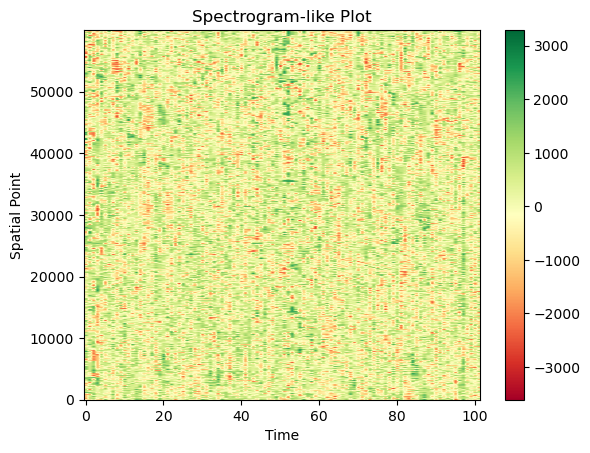

In [141]:
import numpy as np
import matplotlib.pyplot as plt

# Let's generate some example data
# Assume data_all is a 2D array where each row represents a spatial point and each column is a time point
num_spatial_points = 5
num_time_points = 500
data_all = np.random.rand(num_spatial_points, num_time_points)

# Generate time points

# Create a colormap
cmap = plt.get_cmap('RdYlGn')  # Red-Yellow-Green colormap

# Create the figure
fig, ax = plt.subplots()

# Create a pseudo-color plot with the time series data
cax = ax.imshow(strain_data, aspect='auto', cmap=cmap, origin='lower')

# Add a colorbar
fig.colorbar(cax)

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Spatial Point')
ax.set_title('Spectrogram-like Plot')

# Set the x-ticks to represent time
# ax.set_xticks(np.linspace(0, num_time_points-1, 6))
# ax.set_xticklabels(np.linspace(time.min(), time.max(), 6))

# Show the plot
plt.show()
